In [2]:
from models.MigrationSIR import MigrationSIR
from models.Simulation import Simulation

% matplotlib inline

In [3]:
N = 1000
beta, gamma = .2, .1
t = 160  #Дни
dt = 1
citiesNum = 25
simulation = Simulation(MigrationSIR, N, t, dt, beta, gamma, citiesNum)

In [4]:
simulation.addWeights(0.1, 0.3)

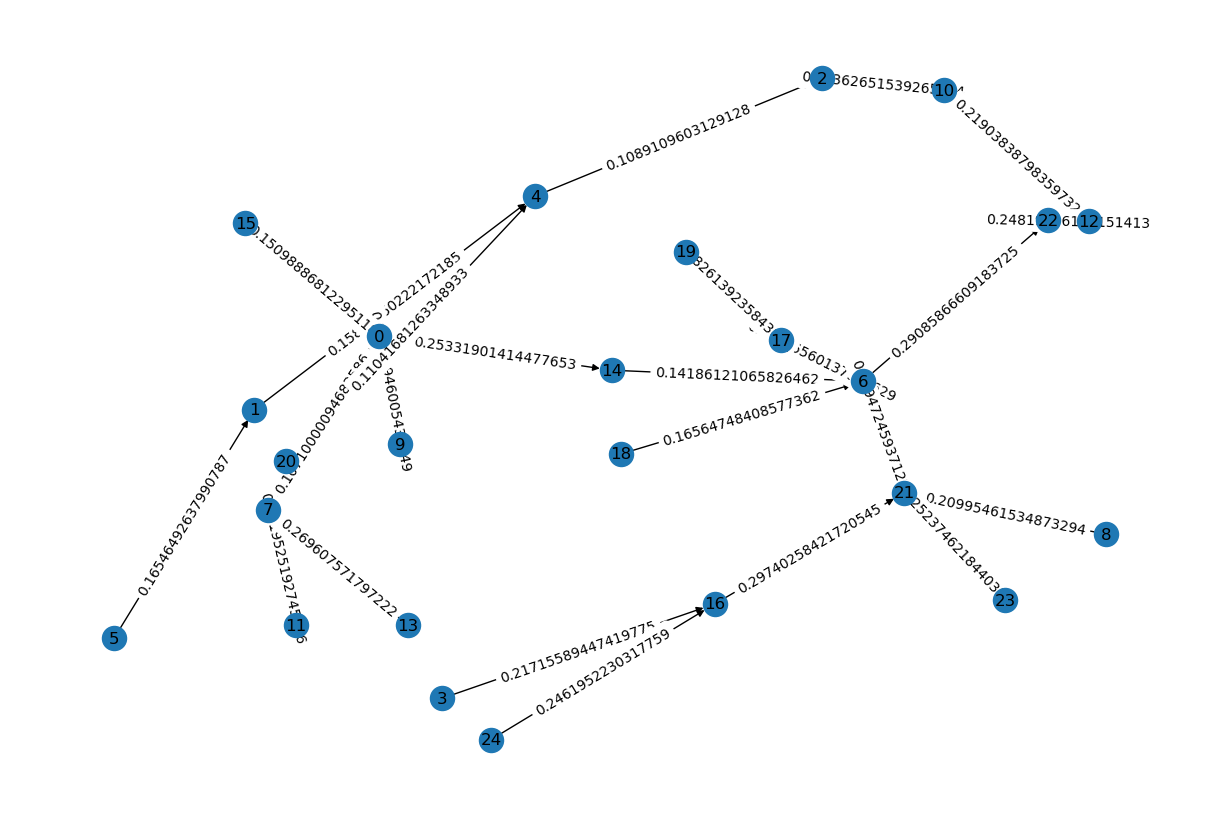

In [5]:
simulation.drawCities()

In [6]:
simulation.runSimulation()

E:\Python\SIRModelSimulation\models\Simulation.py:127: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


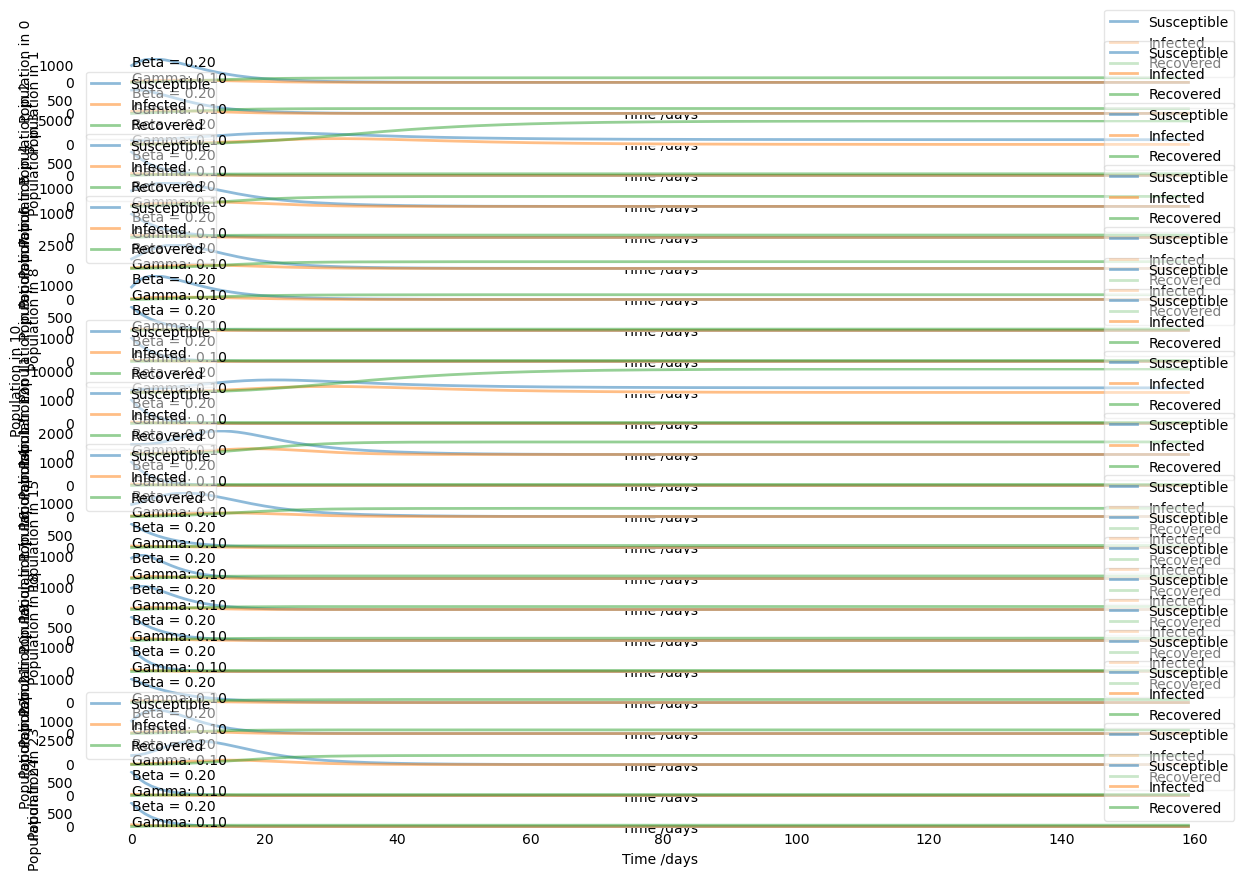

In [7]:
simulation.drawInfectionPlots()

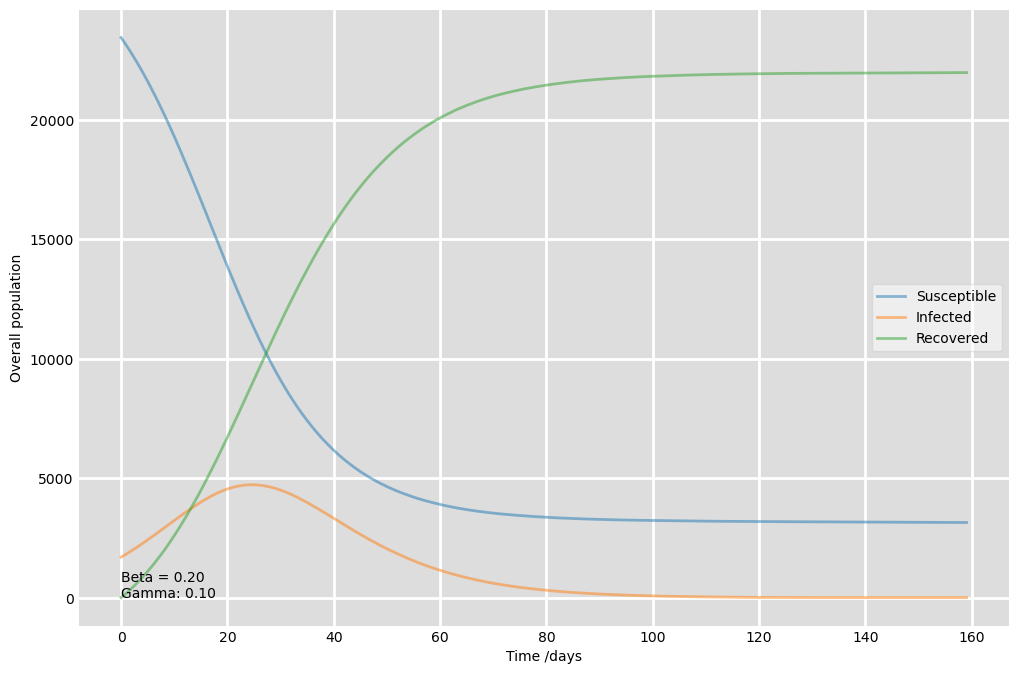

In [8]:
simulation.drawOverallInfectionPlot()